In [1]:
import numpy as np
import pandas as pd  # for data analytics

# The two packages below are for plotting
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

data = pd.read_csv('train.csv')

data.shape

(245725, 11)

In [2]:
data.isnull()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
245720,False,False,False,False,False,False,False,True,False,False,False
245721,False,False,False,False,False,False,False,False,False,False,False
245722,False,False,False,False,False,False,False,False,False,False,False
245723,False,False,False,False,False,False,False,False,False,False,False


In [3]:
data.isnull().sum()
#data.dropna(inplace = True)

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [4]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
245720    False
245721    False
245722    False
245723    False
245724    False
Length: 245725, dtype: bool

In [5]:
data['Avg_Account_Balance'].describe()

count    2.457250e+05
mean     1.128403e+06
std      8.529364e+05
min      2.079000e+04
25%      6.043100e+05
50%      8.946010e+05
75%      1.366666e+06
max      1.035201e+07
Name: Avg_Account_Balance, dtype: float64

<AxesSubplot:>

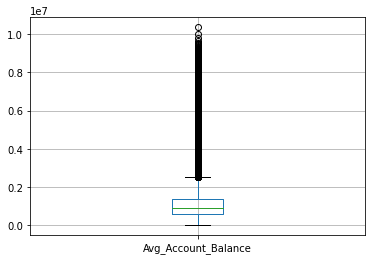

In [6]:
data.boxplot('Avg_Account_Balance')

In [7]:
data['Occupation'] = data['Occupation'].str.lower()

In [8]:
data['ID'] = data['ID'].str.lower()

In [9]:
data['Gender'] = data['Gender'].str.lower()

In [10]:
data.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,nnvbbkzb,female,73,RG268,other,X3,43,No,1045696,No,0
1,idd62ung,female,30,RG277,salaried,X1,32,No,581988,No,0
2,hd3dsemc,female,56,RG268,self_employed,X3,26,No,1484315,Yes,0
3,bf3nc7kv,male,34,RG270,salaried,X1,19,No,470454,No,0
4,teasrwxv,female,30,RG282,salaried,X1,33,No,886787,No,0
5,acutytws,male,56,RG261,self_employed,X1,32,No,544163,Yes,0
6,etqczfej,male,62,RG282,other,X3,20,NaN,1056750,Yes,1
7,jjnjuqmq,female,48,RG265,self_employed,X3,13,No,444724,Yes,0
8,zmqfykcb,female,40,RG283,self_employed,X2,38,No,1274284,No,0
9,nvktfba2,female,55,RG268,self_employed,X2,49,Yes,2014239,No,0


In [11]:
data['Gender'].replace(['female', 'male'],
                        [0, 1], inplace=True)

In [12]:
data['Occupation'].replace(['other', 'self_employed','entrepreneur','salaried'],
                        [0, 1, 2, 3], inplace=True)

In [13]:
data['Channel_Code'].replace(['X1', 'X2','X3','X4'],
                        [0, 1, 2, 3], inplace=True)

In [45]:
data['Credit_Product'].replace(['No', 'Yes'],
                        [0, 1], inplace=True)

In [15]:
data['Is_Active'].replace(['No', 'Yes'],
                        [0, 1], inplace=True)

In [46]:
data.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,nnvbbkzb,0,73,RG268,0,2,43,0,13.860193,0,0
1,idd62ung,0,30,RG277,3,0,32,0,13.274205,0,0
2,hd3dsemc,0,56,RG268,1,2,26,0,14.210464,1,0
3,bf3nc7kv,1,34,RG270,3,0,19,0,13.061453,0,0
4,teasrwxv,0,30,RG282,3,0,33,0,13.695360,0,0
5,acutytws,1,56,RG261,1,0,32,0,13.207004,1,0
6,etqczfej,1,62,RG282,0,2,20,0,13.870709,1,1
7,jjnjuqmq,0,48,RG265,1,2,13,0,13.005209,1,0
8,zmqfykcb,0,40,RG283,1,1,38,0,14.057895,0,0
9,nvktfba2,0,55,RG268,1,1,49,1,14.515752,0,0


In [47]:
from sklearn.impute import SimpleImputer
df=data[['Credit_Product']]
df1 = pd.DataFrame({'A': [2, 2, np.nan, np.nan, np.nan, 8,6,8,2,2]})
# print(df == df1)
print(type(df) == type(df1))

imputer = SimpleImputer(strategy='most_frequent')
imputed = imputer.fit_transform(df)
df_imputed = pd.DataFrame(imputed, columns=df.columns)

True


In [48]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

#cont_feats = [col for col in data.columns if data[col].dtype != object]

mean_imputer = SimpleImputer(strategy='most_frequent')
mean_imputed = mean_imputer.fit_transform(df)
df_mean_imputed = pd.DataFrame(mean_imputed, columns=df.columns)

#df=data[['Credit_Product']]
#df = pd.d({'Credit_Product': data[['Credit_Product']]})

#imputer = SimpleImputer(strategy='most_frequent')
#imputed = imputer.fit_transform(df)
#df_imputed = pd.DataFrame(imputed, columns=df.columns)

data[['Credit_Product']] = df_mean_imputed


In [49]:
data.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,nnvbbkzb,0,73,RG268,0,2,43,0,13.860193,0,0
1,idd62ung,0,30,RG277,3,0,32,0,13.274205,0,0
2,hd3dsemc,0,56,RG268,1,2,26,0,14.210464,1,0
3,bf3nc7kv,1,34,RG270,3,0,19,0,13.061453,0,0
4,teasrwxv,0,30,RG282,3,0,33,0,13.695360,0,0
5,acutytws,1,56,RG261,1,0,32,0,13.207004,1,0
6,etqczfej,1,62,RG282,0,2,20,0,13.870709,1,1
7,jjnjuqmq,0,48,RG265,1,2,13,0,13.005209,1,0
8,zmqfykcb,0,40,RG283,1,1,38,0,14.057895,0,0
9,nvktfba2,0,55,RG268,1,1,49,1,14.515752,0,0


In [50]:
data.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [51]:
df2 = data[['Avg_Account_Balance']]
inp_array = df2
#print( "avg_acct : ",inp_array)

In [52]:
out_array = np.log(inp_array)
#print ("out_array : " ,out_array)

data[['Avg_Account_Balance']] = out_array

<AxesSubplot:>

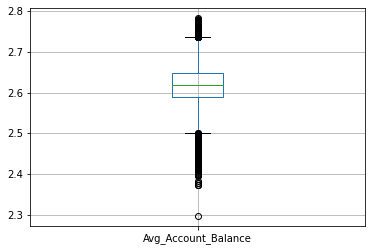

In [53]:
out_array.boxplot(column = 'Avg_Account_Balance')

In [54]:
Q1 = np.percentile(out_array, 25,
                   interpolation = 'midpoint')
print("Q1: ",Q1)

Q3 = np.percentile(out_array, 75,
                  interpolation = 'midpoint')
print("Q3: ",Q3)

IQR = Q3 - Q1
print("IQR: ",IQR)

print("Old Shape: ", out_array.shape)

upper = np.where( out_array >= (Q3+1.5*IQR))
print("upper: ", upper )
lower = np.where( out_array <= (Q3-1.5*IQR))
print("lower: ", lower )

out_array.drop(upper[0], inplace = True)
out_array.drop(lower[0], inplace = True)
 
print("New Shape: ", out_array.shape)



Q1:  2.5886540593608705
Q3:  2.6481504866370424
IQR:  0.05949642727617199
Old Shape:  (245725, 1)
upper:  (array([   113,    184,    211, ..., 245638, 245653, 245701], dtype=int64), array([0, 0, 0, ..., 0, 0, 0], dtype=int64))
lower:  (array([    18,     24,     32, ..., 245717, 245719, 245723], dtype=int64), array([0, 0, 0, ..., 0, 0, 0], dtype=int64))
New Shape:  (223508, 1)


<AxesSubplot:>

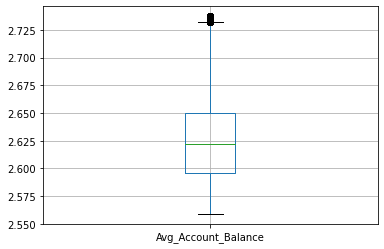

In [55]:
out_array.boxplot(column = 'Avg_Account_Balance')

In [62]:
from sklearn.model_selection import train_test_split


X= data.iloc[:,[1,2,4,5,6,7,8,9]]


y= data.iloc[:,[10]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)


In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


In [85]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Test Accuracy is:", logreg.score(X_test, y_test))
y_test_pred= logreg.predict(X_test)
from sklearn.metrics import confusion_matrix
my_matrix = confusion_matrix(y_test, y_test_pred)
my_matrix


C:\Users\likit\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test Accuracy is: 0.765675869253809


C:\Users\likit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[44881,  2014],
       [12381,  2156]], dtype=int64)

In [82]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC(random_state = 42) # must specify random state here


params_svc = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 100000] }

grid_lr_svc = GridSearchCV(linear_svc, params_svc, cv = 5, n_jobs = 2)

grid_lr_svc.fit(X_train, y_train)

grid_lr_svc.score(X_test, y_test), grid_lr_svc.best_params_

C:\Users\likit\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\likit\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


(0.7479001172027607, {'C': 0.001})

In [84]:
y_test_pred= grid_lr_svc.predict(X_test)
from sklearn.metrics import confusion_matrix
my_matrix = confusion_matrix(y_test, y_test_pred)
my_matrix
array([[40877,  6018],

array([[40877,  6018],
       [ 9469,  5068]], dtype=int64)

In [86]:
from sklearn.tree import DecisionTreeClassifier
opt_tree = DecisionTreeClassifier(random_state = 42)

dt_params = {'max_depth':  range(1,10)         ,
             'min_samples_split':   range(2,11),
             'max_leaf_nodes':    range(2,11)   }



grid_tree = GridSearchCV(opt_tree, dt_params)

grid_tree.fit(X_train, y_train) 
grid_tree.score(X_test, y_test)

KeyboardInterrupt: 

In [87]:
tree_3 = DecisionTreeClassifier(random_state = 0, criterion = 'entropy', max_depth = 3)

tree_3.fit(X_train, y_train)
tree_3.score(X_test, y_test)

0.7813029040239614

In [89]:
y_test_pred= tree_3.predict(X_test)
my_matrix = confusion_matrix(y_test, y_test_pred)
my_matrix

array([[46884,    11],
       [13424,  1113]], dtype=int64)